In [1]:
### setup
library(RCurl) # = getForm()
library(jsonlite)


### functions
LOG = function(txt){
    write(txt, file="log.txt")
}
cData.get = function(key){
    return(cData$data[which(names(cData.keys) == key)])
}
top = function(arr, n=5){
    return(sort(arr, decreasing=T)[1:n])
}
from = function(file){
    return(fromJSON(paste0(tier, index, '/', file)))
}


### read assets
cData = fromJSON('championsData.json')
iData = fromJSON('itemsData.json')
rData = fromJSON('runesDataPatched.json')
## iData.items
iData.items = iData$data
## cData.keys to name
cData.keys = c()
for(champ in cData$data){
    cData.keys[champ$key] = champ$name
}
cData.names = c()
for(champ in cData$data){
    cData.names[champ$name] = champ$key
}


In [2]:
tier = "CHALLENGER/"

In [5]:
index = 1

teamData = list()
enemyData = list()
teamSynerge = c()
is.exist = c()

summoner = from("summoner.json")
matchList = from('matchList.json')
#     stats = from('match_participants_stats.json')
participants = from('match_participants.json')
participantsInfo = from('match_participants_info.json')
#     match = from("match.json")

champion = matchList$champion    
data = lapply(participants, function(x){
    unlist(x$championId)
})
names = sapply(participantsInfo, function(x){
    sapply(x, function(y){
        y$summonerName
    })
})
name = summoner$name



In [8]:
i = 1

In [12]:
game = data[[i]]

synerge = paste(sort(game[1:5]), collapse=",")
teamSynerge = c(teamSynerge, synerge)
synerge = paste(sort(game[6:10]), collapse=",")
teamSynerge = c(teamSynerge, synerge)

teamSynerge

[1] "57,142,235,266,421" "7,26,203,523,875"

In [16]:
names[,i]
index = which(names[,i] == name)
index

[1] "취향특이한도구"  "werewrqd"        "Gen G Rascal"    "SANDBOX GorillA"
 [5] "SANDBOX OnFleek" "zzzhyngh"        "zhonguoren"      "칸 나"          
 [9] "Youtube Thal"    "deokdam"

[1] 9

In [33]:
1

[1] 1

In [27]:
# teamData = list()
# enemyData = list()
# teamSynerge = c()
# is.exist = c()

tier = "GOLD/"

for(index in 1:200){
    summoner = from("summoner.json")
    matchList = from('matchList.json')
#     stats = from('match_participants_stats.json')
    participants = from('match_participants.json')
    participantsInfo = from('match_participants_info.json')
#     match = from("match.json")

    champion = matchList$champion    
    data = lapply(participants, function(x){
        unlist(x$championId)
    })
    names = sapply(participantsInfo, function(x){
        sapply(x, function(y){
            y$summonerName
        })
    })
    name = summoner$name

    for(i in 1:length(champion)){
        game = data[[i]]
        synerge = paste(sort(game[1:5]), collapse=",")
        teamSynerge = c(teamSynerge, synerge)
        synerge = paste(sort(game[6:10]), collapse=",")
        teamSynerge = c(teamSynerge, synerge)

        champ = as.character(champion[i])
        index = which(names[,i] == name)
        if(length(index) == 0) next
        
        if(index > 5){
            team = 2
            if(champ %in% is.exist){
                enemyData[[champ]] = c(enemyData[[champ]], game[1:5])
                teamData[[champ]] = c(teamData[[champ]], game[6:10][-(index-5)])
            }else{
                is.exist = c(is.exist, champ)
                enemyData[[champ]] = game[1:5]
                teamData[[champ]] = game[6:10][-(index-5)]
            }
        }else{
            team = 1
            if(champ %in% is.exist){
                enemyData[[champ]] = c(enemyData[[champ]], game[6:10])
                teamData[[champ]] = c(teamData[[champ]], game[1:5][-index])
            }else{
                is.exist = c(is.exist, champ)
                enemyData[[champ]] = game[6:10]
                teamData[[champ]] = game[1:5][-index]
            }
        }
    }
}

In [34]:
head(sort(table(teamSynerge),decreasing=T))

teamSynerge
     2,7,21,39,111    3,57,58,145,517    3,57,59,126,235   48,76,80,134,236 
                10                 10                 10                 10 
60,236,266,523,875  68,78,110,126,875 
                10                 10 

In [41]:
sum = 0
sum(sapply(teamSynerge, function(sum) sum(table(sum))))

[1] 16000

In [36]:
head(lapply(teamData, function(rank) sort(table(rank), decreasing=T)))

$`26`
rank
523 110 266 875  33  81  84 131   2  21  38  51  57  59  62  64  91 141 202 236 
  6   5   5   5   4   4   4   4   3   3   3   3   3   3   3   3   3   3   3   3 
245   3   7  17  22  28  39  45  54  60  74  80  86 104 115 350 412 421 498   8 
  3   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1 
 11  16  18  20  35  37  41  42  48  53  56  58  61  68  76  78  82  90  99 102 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
105 114 117 122 126 127 134 142 145 164 201 203 223 238 254 429 432 516 517 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 

$`82`
rank
523  81 412 875 104 236  60  64 350 432 517  22  25  48  91 145 555   7  21  59 
 17  12  12  10   9   9   7   7   7   7   6   5   5   5   5   5   5   4   4   4 
103 154 203 429   4   8  26  35  42  55  57  69  84  89  99 157 235 245   1   3 
  4   4   4   4   3   3   3   3   3   3   3   3   3   3   3   3   3   3   2   2 
 18  28  43  

In [37]:
write(toJSON(teamSynerge), file="team_synerge.json")

In [38]:
write(toJSON(teamData), file="team_data.json")
write(toJSON(enemyData), file="enemy_data.json")

In [3]:
data.main = c()
for(index in 1:30){
    summoner = from("summoner.json")
    matchList = from('matchList.json')
    stats = from('match_participants_stats.json')
    participants = from('match_participants.json')
    match = from("match.json")

    champion = matchList$champion
    duration = unlist(match$gameDuration)
    role = data.frame(role = matchList$role, stringsAsFactors = F)
    lane = data.frame(lane = matchList$lane, stringsAsFactors = F)

    data = cbind(role, lane, champion, duration) #🥰

    sIndex = unlist(sapply(participants, function(x) which(x$championId == champion[parent.frame()$i])))

    result = sapply(stats, function(games){
        c(
            win = games[[sIndex[parent.frame()$i]]]$win,
            kill = games[[sIndex[parent.frame()$i]]]$kills,
            death = games[[sIndex[parent.frame()$i]]]$deaths,
            assist = games[[sIndex[parent.frame()$i]]]$assists,
            cs = games[[sIndex[parent.frame()$i]]]$totalMinionsKilled,
            boughtWards = games[[sIndex[parent.frame()$i]]]$visionWardsBoughtInGame,
    #         games[[sIndex[parent.frame()$i]]]$sightWardsBoughtInGame
            wardsPlaced = games[[sIndex[parent.frame()$i]]]$wardsPlaced,
            wardsKilled = games[[sIndex[parent.frame()$i]]]$wardsKilled,
            visionScore = games[[sIndex[parent.frame()$i]]]$visionScore,
            perkMainStyle = games[[sIndex[parent.frame()$i]]]$perkPrimaryStyle,
            perkSubStyle = games[[sIndex[parent.frame()$i]]]$perkSubStyle,
            perk0 = games[[sIndex[parent.frame()$i]]]$perk0,
            perk1 = games[[sIndex[parent.frame()$i]]]$perk1,
            perk2 = games[[sIndex[parent.frame()$i]]]$perk2,
            perk3 = games[[sIndex[parent.frame()$i]]]$perk3,
            perk4 = games[[sIndex[parent.frame()$i]]]$perk4,
            perk5 = games[[sIndex[parent.frame()$i]]]$perk5,
            item0 = games[[sIndex[parent.frame()$i]]]$item0,
            item1 = games[[sIndex[parent.frame()$i]]]$item1,
            item2 = games[[sIndex[parent.frame()$i]]]$item2,
            item3 = games[[sIndex[parent.frame()$i]]]$item3,
            item4 = games[[sIndex[parent.frame()$i]]]$item4,
            item5 = games[[sIndex[parent.frame()$i]]]$item5,
            item6 = games[[sIndex[parent.frame()$i]]]$item6
        )
    })

    data = cbind(data, data.frame(t(result)))
    data.main = rbind(data.main, data)
}

In [4]:
str(data.main)

'data.frame':	300 obs. of  28 variables:
 $ role         : chr  "SOLO" "DUO_SUPPORT" "SOLO" "NONE" ...
 $ lane         : chr  "TOP" "NONE" "TOP" "JUNGLE" ...
 $ champion     : int  26 82 83 245 48 517 126 236 83 122 ...
 $ duration     : int  1583 1172 1517 2278 1861 2237 1579 1860 2500 946 ...
 $ win          : int  1 1 1 1 1 0 1 1 0 0 ...
 $ kill         : int  5 0 1 8 5 7 8 5 7 2 ...
 $ death        : int  1 4 1 5 1 5 2 4 2 4 ...
 $ assist       : int  20 5 2 14 5 9 10 10 2 2 ...
 $ cs           : int  129 107 185 52 219 212 158 206 332 110 ...
 $ boughtWards  : int  4 3 4 11 3 8 4 6 8 0 ...
 $ wardsPlaced  : int  13 8 11 13 13 13 12 13 13 5 ...
 $ wardsKilled  : int  4 1 5 8 11 8 4 4 13 1 ...
 $ visionScore  : int  21 14 22 33 39 27 29 33 56 7 ...
 $ perkMainStyle: int  8300 8000 8000 8100 8000 8000 8200 8000 8000 8000 ...
 $ perkSubStyle : int  8200 8400 8400 8300 8400 8200 8300 8200 8400 8200 ...
 $ perk0        : int  8351 8010 8010 8128 8010 8010 8230 8005 8010 8010 ...
 $ perk

In [430]:
# 경기시간이 20분 미만인 것은 삭제 => 라인 결정(NONE삭제), 역할 결정(SUPPORT, CARRY)  
data.f1 = data.main[data.main$duration>=1200,]
if(any(data.f1$role == "DUO_SUPPORT")) data.f1[data.f1$role == "DUO_SUPPORT",]$lane = "SUPPORT"
nrow(data.f1) # filter1 = 경기시간 > 20분

[1] 8

In [431]:
# 인기있는 챔피언
인기있는챔피언 = sort(table(data.main$champion), decreasing=T)
names(인기있는챔피언) = cData.keys[as.character(names(sort(table(data.main$champion), decreasing=T)))]

head(인기있는챔피언, n=20)

      요릭     질리언     트런들 모데카이저   다리우스     제이스     루시안 
         2          1          1          1          1          1          1 
      에코   사일러스 
         1          1 

In [433]:
# 챔피언 필터링
data.f2 = data.f1[data.f1$champion == cData.names['에코'],]
data.f2 # filter2 = 챔피언

,role,lane,champion,duration,win,kill,death,assist,cs,boughtWards,⋯,perk3,perk4,perk5,item0,item1,item2,item3,item4,item5,item6
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,NONE,JUNGLE,245,2278,1,8,5,14,52,11,⋯,8135,8304,8347,3152,3157,3047,0,1402,3165,3364


In [434]:
table(data.f2$lane)


JUNGLE 
     1 

In [436]:
# 라인 필터링 on 챔프 필터링
data.f3 = data.f2[data.f2$lane == 'JUNGLE',]
data.f3

,role,lane,champion,duration,win,kill,death,assist,cs,boughtWards,⋯,perk3,perk4,perk5,item0,item1,item2,item3,item4,item5,item6
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,NONE,JUNGLE,245,2278,1,8,5,14,52,11,⋯,8135,8304,8347,3152,3157,3047,0,1402,3165,3364


In [437]:
# cData.keys[as.character(unique(data.f3$champion))]

data.test = data.f3
a = data.test
a.items = c()
a.runes = c()
for(i in 1:nrow(a)){
    a.item = a[i,22:28]
    a.rune = a[i,14:21]
    item = sapply(iData.items[as.character(unlist(a.item))], function(x) x$name)
    item[is.na(names(item))] = "X" 
    a.items = rbind(a.items, unlist(item))
    a.runes = rbind(a.runes, unlist(rData[as.character(unlist(a.rune))]))
}
print("ITEM")
a.items
print("룬 랭킹")
names(sort(table(apply(a.runes, 1, function(x) paste(x, collapse=' - '))), decreasing=T))

[1] "ITEM"


3152,3157,3047,NA,1402,3165,3364
마법공학 초기형 벨트-01,존야의 모래시계,닌자의 신발,X,마법 부여: 룬의 메아리,모렐로노미콘,예언자의 렌즈


[1] "룬 랭킹"


[1] "지배 - 영감 - 어둠의 수확 - 돌발 일격 - 사냥의 증표 - 굶주린 사냥꾼 - 마법의 신발 - 우주적 통찰력"

In [438]:
perks = data.test['perk0']
for(i in 1:5){
    perks = cbind(perks, data.test[paste0('perk', i)])
}
perks.rank = sapply(perks, function(x) rData[names(sort(table(x), decreasing=T))])
perks.rank # 룬 순위

$perk0.8128
[1] "어둠의 수확"

$perk1.8143
[1] "돌발 일격"

$perk2.8138
[1] "사냥의 증표"

$perk3.8135
[1] "굶주린 사냥꾼"

$perk4.8304
[1] "마법의 신발"

$perk5.8347
[1] "우주적 통찰력"

In [439]:
data.test = data.f3

In [440]:
# 이긴 데이터와 진 데이터 구분하여 비교해보기
winData = data.test[data.test$win==1, -5]
wLane = unique(winData$lane)
loseData = data.test[data.test$win==0, -5]
lLane = unique(loseData$lane)
aLane = unique(data.test$lane)

In [441]:
print("### WINNER #########################################")
results = c()
for(lane in wLane){
    result = sapply(winData[winData$lane == lane, ][,4:12], mean)
    result['length'] = nrow(winData[winData$lane == lane, ])
    results = rbind(results, t(result))
}
results = data.frame(results)
results$lane = wLane
results
write(toJSON(results), file="winData.json")

print("### LOSER #########################################")
results = c()
for(lane in lLane){
    result = sapply(loseData[loseData$lane == lane, ][,4:12], mean)
    result['length'] = nrow(loseData[loseData$lane == lane, ])
    results = rbind(results, t(result))
}
results = data.frame(results)
results$lane = lLane
results
write(toJSON(results), file="loseData.json")

print("### ALL #########################################")
results = c()
for(lane in aLane){
    result = sapply(data.test[data.test$lane == lane, ][,4:13], mean)
    result['length'] = nrow(data.test[data.test$lane == lane, ])
    results = rbind(results, t(result))
}
results = data.frame(results)
results$lane = aLane
results
write(toJSON(results), file="allData.json")


[1] "### WINNER #########################################"


duration,kill,death,assist,cs,boughtWards,wardsPlaced,wardsKilled,visionScore,length,lane
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2278,8,5,14,52,11,13,8,33,1,JUNGLE


[1] "### LOSER #########################################"


lane
<chr>


[1] "### ALL #########################################"


duration,win,kill,death,assist,cs,boughtWards,wardsPlaced,wardsKilled,visionScore,length,lane
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2278,1,8,5,14,52,11,13,8,33,1,JUNGLE


In [442]:
data.test = data.f3
# data.test

In [446]:
# 모평균의 추정
n = nrow(data.test) # 충분히 큼
means = sapply(data.test[,4:13], mean)
sds = sapply(data.test[,4:13], sd)


In [444]:
# filter3_1 : 10%절사평균
n = nrow(data.test) # 충분히 큼
ms = floor(n/10)
data.f3_1 = data.frame(lapply(data.test[, 4:13], function(x) sort(x)[c(-1:-ms/2, -n:-(n-ms/2))]))
# cbind(data.f3[,1:3], data.f4) 🙀 주의할 점: 각 요소는 독립적, 서로의 관계가 무너짐
# data.f4
means = sapply(data.f3_1, mean)
sds = sapply(data.f3_1, sd)

In [447]:
# 절사평균
# pnorm(1.96, mean=0, sd=1)
# qnorm(0.025, mean=0, sd=1)
a = .1 # 90% 신뢰구간
n > 30 # 충분히 커서 Z값과 T값이 큰 차이가 없음
Za = qnorm(1-a/2, mean=0, sd=1)
Ta = qt(1-a/2, df=n)
print("Z로 근사한 구간추정")
cat(paste(names(means), ">>", floor(means-(sds/sqrt(n))*Za), "~", floor(means+(sds/sqrt(n))*Za), collapse="\n"))
cat("\n\n")
print('T 구간추정')
cat(paste(names(means), ">>", floor(means-(sds/sqrt(n))*Ta), "~", floor(means+(sds/sqrt(n))*Ta), collapse="\n"))

[1] FALSE

[1] "Z로 근사한 구간추정"
duration >> NA ~ NA
win >> NA ~ NA
kill >> NA ~ NA
death >> NA ~ NA
assist >> NA ~ NA
cs >> NA ~ NA
boughtWards >> NA ~ NA
wardsPlaced >> NA ~ NA
wardsKilled >> NA ~ NA
visionScore >> NA ~ NA

[1] "T 구간추정"
duration >> NA ~ NA
win >> NA ~ NA
kill >> NA ~ NA
death >> NA ~ NA
assist >> NA ~ NA
cs >> NA ~ NA
boughtWards >> NA ~ NA
wardsPlaced >> NA ~ NA
wardsKilled >> NA ~ NA
visionScore >> NA ~ NA

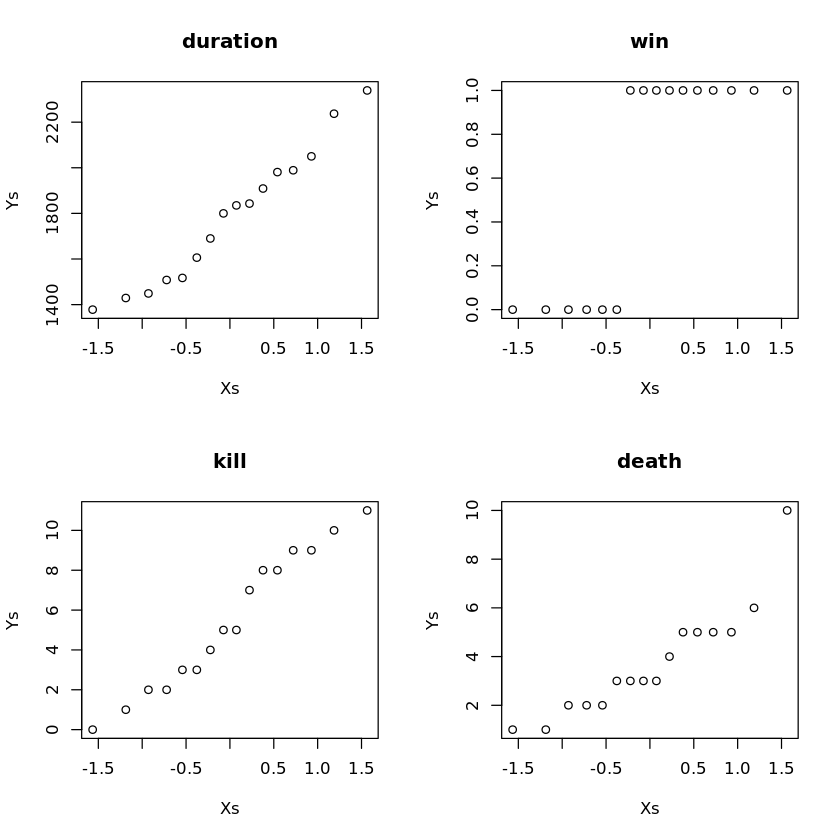

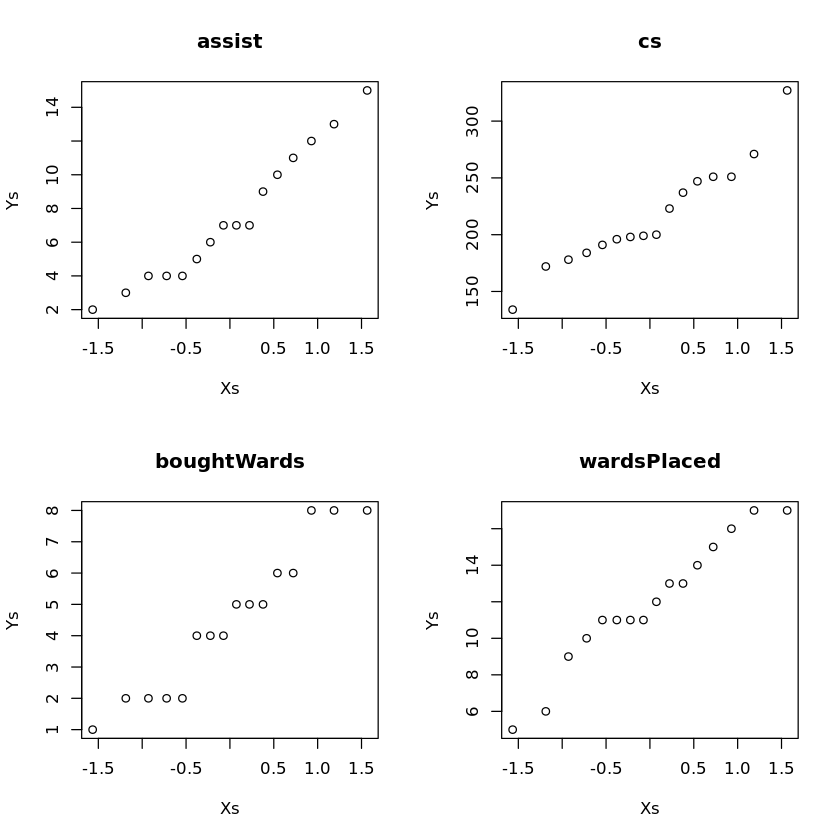

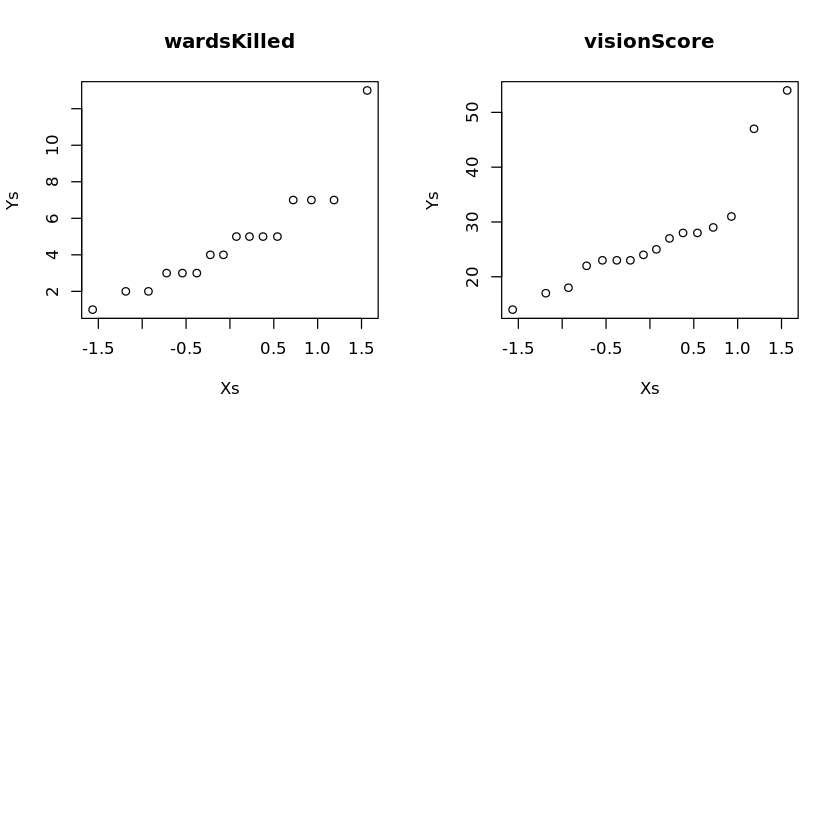

In [379]:
# 정규분포 분위수대조도
par(mfrow=c(2,2))
data.show = data.f3[, 4:13]
for(i in 1:ncol(data.show)){
    x = data.show[i]
    Ys = sort(unlist(x))
    Xs = qnorm(seq(0,1, length=length(Ys)+2)[c(-1,-(length(Ys)+2))], mean=0, sd=1)
    plot(Ys~Xs, main = names(x))
}